In [1]:
import spacy
import pandas as pd
import nltk
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import sys
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
from collections import Counter
import string 
import seaborn as sns
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.naive_bayes import MultinomialNB

In [2]:
nlp=spacy.load("en_core_web_sm")

In [3]:
def readData(filename):
    data = pd.read_csv(filename, sep=',',index_col=0)
    return data

In [4]:
data= readData('labeled_data.csv')
data["class"]
is_1 =  data['class']==1
is_2 =  data['class']==2
is_3 =  data['class']==0
#print((is_1))
class_1 = data[is_1]
class_2 = data[is_2]
class_0 = data[is_3]
print(len(class_1))
print(len(class_2))
print(len(class_0))

19190
4163
1430


In [5]:
neg = (len(class_1))
pos = (len(class_2))
neu = (len(class_0))
print(pos)

4163


([<matplotlib.axis.XTick at 0x1a1af29b70>,
 <a list of 3 Text xticklabel objects>)

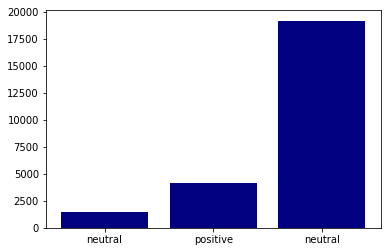

In [6]:
class1 = [neu,pos,neg]
bars = ('neutral','positive','neutral')
y_pos =np.arange(len(bars))
plt.bar(y_pos,class1,color='navy')
plt.xticks(y_pos, bars)

In [7]:
tweets=data[['tweet','class']]
df = pd.DataFrame(tweets) #convert series to dataframe
print(df.head())
dfToList = df['tweet'].tolist()
dfToList[1:10]
tweet1=" ".join(str(x) for x in dfToList)
#print(tweet1)
#type(tweet1)

                                               tweet  class
0  !!! RT @mayasolovely: As a woman you shouldn't...      2
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      1
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      1


In [8]:
ps = nltk.PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words= stopwords.words('english')

def clean_text(text):
    text_rc1 = re.sub('[0-9]+', '', text)
    text_rc2 = re.sub('RT @[\w_]+', '', text_rc1)
    text_rc3 = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_rc2)
    text = re.sub('@[\w_]+', '', text_rc3)
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    tokens = re.split('\W+', text_lc)    # tokenization
    text1 = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    text = [ps.stem(word) for word in text1 if word not in stop_words]  # remove stopwords and stemming
    return text

In [9]:
df['tweet_clean'] = df['tweet'].apply(lambda x: clean_text(x))
df.head()

,tweet,class,tweet_clean
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,"[, woman, shouldnt, complain, clean, hous, amp..."
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,"[, boy, dat, coldtyga, dwn, bad, cuffin, dat, ..."
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,"[, dawg, ever, fuck, bitch, start, cri, confus..."
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,"[, look, like, tranni]"
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,"[, shit, hear, might, true, might, faker, bitc..."


In [10]:
df['tweet_string'] = [','.join(map(str, l)) for l in df['tweet_clean']]
df.head()

,tweet,class,tweet_clean,tweet_string
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,"[, woman, shouldnt, complain, clean, hous, amp...",",woman,shouldnt,complain,clean,hous,amp,man,al..."
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,"[, boy, dat, coldtyga, dwn, bad, cuffin, dat, ...",",boy,dat,coldtyga,dwn,bad,cuffin,dat,hoe,st,place"
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,"[, dawg, ever, fuck, bitch, start, cri, confus...",",dawg,ever,fuck,bitch,start,cri,confus,shit"
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,"[, look, like, tranni]",",look,like,tranni"
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,"[, shit, hear, might, true, might, faker, bitc...",",shit,hear,might,true,might,faker,bitch,told,ya,"


In [11]:
def clean_tweets(tweet):
    words = clean_text(tweet)
    return words

word1=(clean_tweets(tweet1))
len(word1)
str_words = ','.join(word1)
#print(str_words)

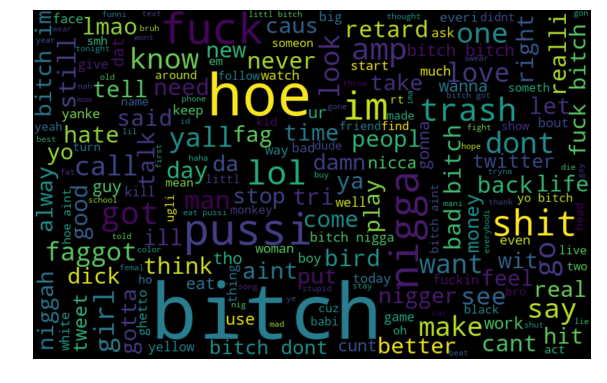

In [12]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
all_words = []
for line in list(df['tweet_string']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)
type(all_words)

list

In [14]:
#TRAIN AND TEST DATA
x_train, x_test, y_train, y_test = train_test_split(df["tweet_string"],df["class"], test_size = 0.2, random_state = 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(19826,)
(19826,)
(4957,)
(4957,)
Counter({1: 15337, 2: 3355, 0: 1134})
Counter({1: 3853, 2: 808, 0: 296})


In [15]:
results_df = pd.DataFrame()

## WORD EMBEDDINGS

WORD2VEC

In [16]:
import gensim 
from gensim.models import Word2Vec 

In [17]:
#CBOW
model1 = gensim.models.Word2Vec([word1], min_count = 1,  size = 100, window = 5, workers = 10)
model1.train(word1, total_examples=len(word1),epochs=100)
main = dict(zip(model1.wv.index2word, model1.wv.vectors))
main_cbow = dict(zip(model1.wv.index2word, model1.wv.vectors))

In [18]:
#Skipgram
model2 = gensim.models.Word2Vec([word1], min_count = 1, size = 100, window = 5, sg = 1,workers =10)
model2.train(word1, total_examples=len(word1),epochs=10)
main_skipgram = dict(zip(model1.wv.index2word, model1.wv.vectors))


In [19]:
model1.wv.most_similar('bitch')

[('pussi', 0.9533669948577881),
 ('hoe', 0.9487327337265015),
 ('fuck', 0.9405096769332886),
 ('pornandroidiphoneipadsexxxx', 0.9373900890350342),
 ('yall', 0.9324550032615662),
 ('im', 0.9273819327354431),
 ('like', 0.921648383140564),
 ('love', 0.9198954105377197),
 ('get', 0.9189555048942566),
 ('that', 0.9178645610809326)]

In [20]:
model2.wv.most_similar('bitch')

[('man', 0.9996177554130554),
 ('bird', 0.9995836615562439),
 ('fuck', 0.9995737075805664),
 ('your', 0.9995435476303101),
 ('amp', 0.9995433688163757),
 ('im', 0.9995349049568176),
 ('hate', 0.9995337724685669),
 ('trash', 0.9995324611663818),
 ('that', 0.9995304942131042),
 ('get', 0.9995241165161133)]

In [21]:
print("Cosine similarity between 'bitch' " +  "and 'hoe' - CBOW : ", model1.wv.similarity('bitch', 'hoe')) 
print("Cosine similarity between 'bitch' " +  "and 'hoe' - Skipgram : ", model2.wv.similarity('bitch', 'hoe')) 

Cosine similarity between 'bitch' and 'hoe' - CBOW :  0.948732763879265
Cosine similarity between 'bitch' and 'hoe' - Skipgram :  0.9995202852368763


FASTEXT

In [22]:
from gensim.models.fasttext import FastText as FT_gensim

In [23]:
model_gensim = FT_gensim(size=100)

In [38]:
model3 = FT_gensim([word1], min_count=1,size=100)
model3.train(word1, total_examples=len(word1),epochs=10)
main_ft = dict(zip(model3.wv.index2word, model3.wv.vectors))

Exception in thread Thread-1370:
Traceback (most recent call last):
  File "/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/gensim/models/base_any2vec.py", line 99, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, job_parameters, thread_private_mem)
  File "/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/gensim/models/fasttext.py", line 456, in _do_train_job
    tally += train_batch_cbow(self, sentences, alpha, work, neu1)
  File "gensim/models/fasttext_inner.pyx", line 448, in gensim.models.fasttext_inner.train_batch_cbow
TypeError: 'NoneType' object is not subscriptable

Exception in thread Thread-1371:
Traceback (most recent call last):
  

KeyboardInterrupt: 

In [25]:
model3.wv.most_similar('bitch')

[('bitchbitch', 0.9997605085372925),
 ('bitchand', 0.999603807926178),
 ('thatbitch', 0.999563992023468),
 ('bitchi', 0.9995561838150024),
 ('bitchin', 0.999545156955719),
 ('bitchon', 0.9995243549346924),
 ('niggabitch', 0.9995166063308716),
 ('bitchal', 0.9995056986808777),
 ('bitchlol', 0.9995052218437195),
 ('bitchk', 0.999475359916687)]

In [26]:
print("Cosine similarity between 'bitch' " +  "and 'hoe' - fastext : ", model3.wv.similarity('bitch', 'hoe')) 

Cosine similarity between 'bitch' and 'hoe' - fastext :  0.9982322102810293


# #FEATURE EXTRACTION

BAG OF WORDS

In [27]:
cv = CountVectorizer()
x_traincv=cv.fit_transform(x_train)
y_traincv=y_train.astype('int')
x_testcv=cv.transform(x_test)

In [28]:
lreg_clf_bow = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=42,max_iter=1000)
lreg_clf_bow.fit(X=x_traincv, y=y_train)                         

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

TFIDF

In [29]:
cv1=TfidfVectorizer(min_df=1,stop_words='english') #best method for large dataset

In [30]:
x_traincv1=cv1.fit_transform(x_train)
y_traincv1=y_train.astype('int')
x_testcv1=cv1.transform(x_test)

In [31]:
lreg_clf_tfidf = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1000, max_iter=1000)
lreg_clf_tfidf.fit(X=x_traincv1, y=y_traincv1)                         

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1000, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
results_df.set_value("LREG" , "countVectorizer" , accuracy_score(y_test,lreg_clf_bow.predict(x_testcv)))
results_df.set_value("LREG" , "tfidf" , accuracy_score(y_test,lreg_clf_tfidf.predict(x_testcv1)))

/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,countVectorizer,tfidf
LREG,0.895703,0.896107


In [33]:
y_pred_bow = lreg_clf_bow.predict(x_testcv)
y_pred_tfidf = lreg_clf_tfidf.predict(x_testcv1)

print(Counter(y_pred_bow))
print(Counter(y_pred_tfidf))

Counter({1: 3933, 2: 891, 0: 133})
Counter({1: 4037, 2: 831, 0: 89})


WORD EMBEDDINGS

In [34]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec[next(iter(main))])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec[next(iter(main))])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [35]:
word_embed_sk = Pipeline(
    [("glov mean vectorizer", MeanEmbeddingVectorizer(main_skipgram)),
     ("LREG", LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42))])
word_embed_sk.fit(X=x_train, y=y_train)
results_df.set_value("LREG", "word_embed_sk", accuracy_score(y_test, word_embed_sk.predict(x_test)))

/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,countVectorizer,tfidf,word_embed_sk
LREG,0.895703,0.896107,0.787977


In [36]:
word_embed_cbow = Pipeline(
    [("glov mean vectorizer", MeanEmbeddingVectorizer(main_cbow)),
     ("LREG", LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42))])
word_embed_cbow.fit(X=x_train, y=y_train)
results_df.set_value("LREG", "word_embed_cbow", accuracy_score(y_test, word_embed_cbow.predict(x_test)))

/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pathakgaurav/anaconda3/envs/nlp_course/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,countVectorizer,tfidf,word_embed_sk,word_embed_cbow
LREG,0.895703,0.896107,0.787977,0.787977


In [37]:
word_embed_ft = Pipeline(
    [("glov mean vectorizer", MeanEmbeddingVectorizer(main_ft)),
     ("LREG", LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42))])
word_embed_ft.fit(X=x_train, y=y_train)
results_df.set_value("LREG", "word_embed_ft", accuracy_score(y_test, word_embed_ft.predict(x_test)))

NameError: name 'main_ft' is not defined

In [ ]:
y_pred_cbow = word_embed_cbow.predict(x_test)
y_pred_skipgram = word_embed_sk.predict(x_test)
y_pred_ft = word_embed_ft.predict(x_test)
y_pred_bow = lreg_clf_bow.predict(x_testcv)
y_pred_tfidf = lreg_clf_tfidf.predict(x_testcv1)



print("Word2Vec CBOW:",Counter(y_pred_cbow))
print("Word2Vec Skipgram:",Counter(y_pred_skipgram))
print("FastText:",Counter(y_pred_ft))
print("BOW:",Counter(y_pred_bow))
print("TFIDF:",Counter(y_pred_tfidf))

In [40]:
y_pred_cbow1 = word_embed_cbow.predict("That bitch is crazy.")

In [41]:
y_pred_cbow1

array([2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2])